In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv("../data/bank_reviews_with_themes.csv")

In [4]:
# Sentiment Distribution by Bank
sentiment_counts = df.groupby(['bank', 'bert_sentiment']).size().unstack().fillna(0)
print(sentiment_counts)

bert_sentiment               negative  neutral  positive
bank                                                    
Bank of Abyssinia               352.0      2.0     246.0
Commercial Bank of Ethiopia     183.0      4.0     413.0
Dashen Bank                     104.0      0.0     344.0


In [6]:
# Extract Top Themes
from collections import Counter

def extract_top_themes(dataframe, sentiment_label, top_n=10):
    filtered = dataframe[dataframe['bert_sentiment'] == sentiment_label]
    all_themes = filtered['identified_theme(s)'].dropna().astype(str).tolist()
    themes = [theme.strip().lower() for line in all_themes for theme in line.split(',')]
    return Counter(themes).most_common(top_n)

cbe = df[df['bank'] == "Commercial Bank of Ethiopia"]
aby = df[df['bank'] == "Bank of Abyssinia"]
dsh = df[df['bank'] == "Dashen Bank"]

print("CBE Pain Points:")
print(extract_top_themes(cbe, "negative"))
print("\nCBE Satisfaction Drivers:")
print(extract_top_themes(cbe, "positive"))

print("Abyssinia Pain Points:")
print(extract_top_themes(aby, "negative"))
print("\nAbyssinia Satisfaction Drivers:")
print(extract_top_themes(aby, "positive"))

print("Dashen Pain Points:")
print(extract_top_themes(dsh, "negative"))
print("\nDashen Satisfaction Drivers:")
print(extract_top_themes(dsh, "positive"))


CBE Pain Points:
[('uncategorized', 78), ('app performance', 70), ('user experience', 44), ('customer satisfaction', 33), ('functionality', 28)]

CBE Satisfaction Drivers:
[('customer satisfaction', 273), ('app performance', 165), ('uncategorized', 48), ('user experience', 35), ('functionality', 21)]
Abyssinia Pain Points:
[('app performance', 223), ('uncategorized', 108), ('functionality', 97), ('customer satisfaction', 53), ('issues & complaints', 33)]

Abyssinia Satisfaction Drivers:
[('customer satisfaction', 129), ('uncategorized', 79), ('app performance', 68), ('functionality', 22)]
Dashen Pain Points:
[('uncategorized', 46), ('app performance', 45), ('customer satisfaction', 22), ('functionality', 20), ('user experience', 17)]

Dashen Satisfaction Drivers:
[('customer satisfaction', 204), ('app performance', 194), ('user experience', 104), ('functionality', 91), ('uncategorized', 55)]


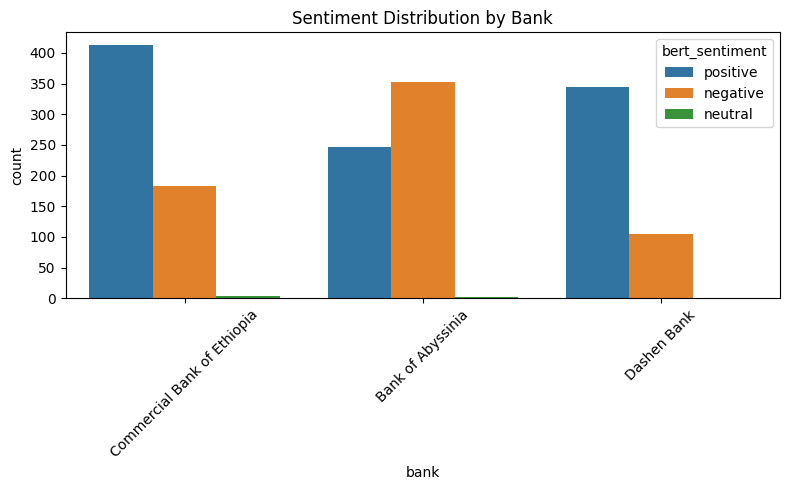

In [9]:
# Sentiment Distribution

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='bank', hue='bert_sentiment')
plt.title("Sentiment Distribution by Bank")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

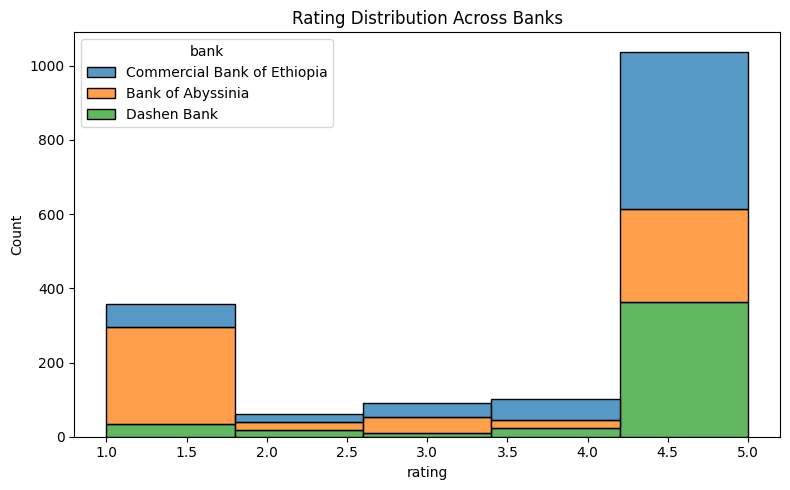

In [10]:
# Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='rating', hue='bank', multiple='stack', bins=5)
plt.title("Rating Distribution Across Banks")
plt.tight_layout()
plt.show()

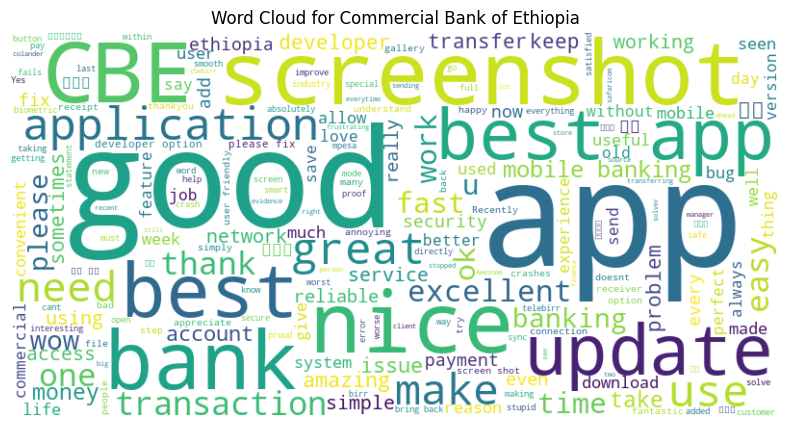

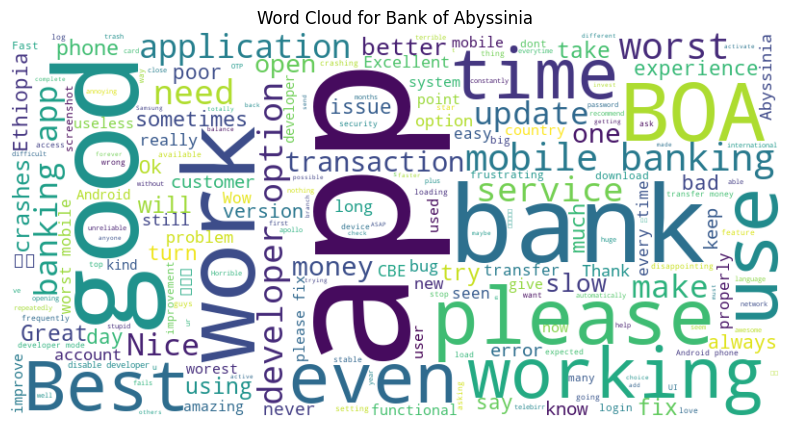

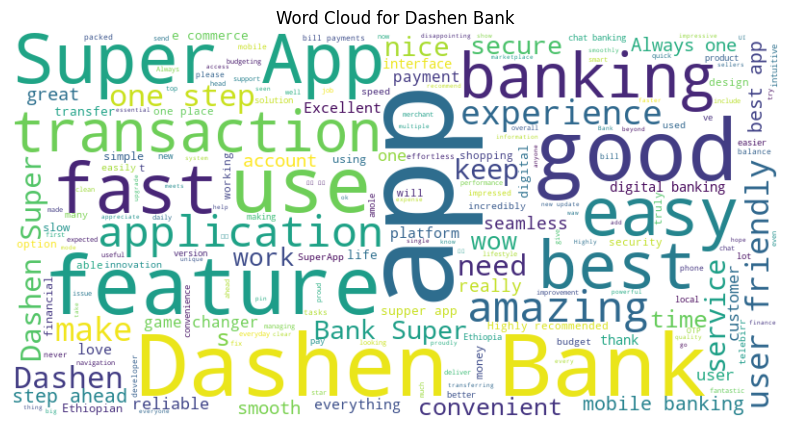

In [13]:
from wordcloud import WordCloud
def plot_wordcloud(bank_name):
    text = " ".join(df[df['bank'] == bank_name]['review'].dropna().astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {bank_name}")
    plt.show()

plot_wordcloud("Commercial Bank of Ethiopia")
plot_wordcloud("Bank of Abyssinia")
plot_wordcloud("Dashen Bank")


### Insights


#### Sentiment Distribution by Bank

| Bank                         | Positive | Negative | Neutral |
|-----------------------------|----------|----------|---------|
| **Commercial Bank of Ethiopia** | 413      | 183      | 4       |
| **Bank of Abyssinia**           | 246      | 352      | 2       |
| **Dashen Bank**                 | 344      | 104      | 0       |

---

#### Commercial Bank of Ethiopia (CBE)

#### Top Satisfaction Drivers
- **Customer Satisfaction** (273 mentions)
- **App Performance** (165)
- **Uncategorized** (48)
- **User Experience** (35)
- **Functionality** (21)

#### Pain Points
- **Uncategorized** (78 mentions)
- **App Performance** (70)
- **User Experience** (44)
- **Customer Satisfaction** (33)
- **Functionality** (28)

#### Recommendations
1. Optimize **app performance**, especially around loading speed and responsiveness.
2. Investigate recurring **user experience** complaints and enhance usability.
3. Explore what’s behind the **“uncategorized”** issues and reclassify them for clearer diagnostics.

---

#### Bank of Abyssinia

#### Top Satisfaction Drivers
- **Customer Satisfaction** (129 mentions)
- **Uncategorized** (79)
- **App Performance** (68)
- **Functionality** (22)

#### Pain Points
- **App Performance** (223 mentions)
- **Uncategorized** (108)
- **Functionality** (97)
- **Customer Satisfaction** (53)
- **Issues & Complaints** (33)

#### Recommendations
1. Prioritize fixing **performance issues** such as lag, crashes, and login delays.
2. Refine **app functionality** to reduce user confusion and operational bugs.
3. Better **categorize complaints** to help inform product improvement.

---

#### Dashen Bank

#### Top Satisfaction Drivers
- **Customer Satisfaction** (204 mentions)
- **App Performance** (194)
- **User Experience** (104)
- **Functionality** (91)
- **Uncategorized** (55)

#### Pain Points
- **Uncategorized** (46 mentions)
- **App Performance** (45)
- **Customer Satisfaction** (22)
- **Functionality** (20)
- **User Experience** (17)

#### Recommendations
1. Maintain and build upon strong **customer satisfaction** and **user experience** feedback.
2. Resolve **performance complaints** to preserve positive sentiment.
3. Continue improving **core app features** that drive user satisfaction.

---

#### General Observations

- **CBE** has the highest number of positive reviews, but also significant issues in UX and performance.
- **Abyssinia** struggles most with performance and functional reliability, explaining its higher negative sentiment count.
- **Dashen Bank** has the **most favorable sentiment balance**, with positive reviews outpacing negatives by more than 3x.
